# Gradient Descent for Linear Regression

Goals: Automate the process of optimizing w and b using gradient descent

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<a name="toc_40291_2"></a>
# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [2]:
# load our data set
x_train = np.array([1.,2.]) # features
y_train = np.array([300., 500.]) # target value 

### Compute_Cost

In [3]:
# function to calculate the cost 
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    
    return total_cost

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [4]:
def compute_gradient(x, y, w, b):
    """
    Compute the gradient for linear regression (does not include the alpha learning rate)
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t the parameter w
      dj_db (scalar): The gradient of the cost w.r.t the parameter b
    """
    # number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    return dj_dw, dj_db
        

The lectures described how gradient descent utilizes the partial derivative of the cost with respect to a parameter at a point to update that parameter.   
Let's use our `compute_gradient` function to find and plot some partial derivatives of our cost function relative to one of the parameters, $w_0$.


<a name="toc_40291_2.5"></a>
###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, compute_gradient):
    """
      Performs gradient descent to fit w,b. Updates w,b by taking 
      num_iters gradient steps with learning rate alpha

      Args:
        x (ndarray (m,))  : Data, m examples 
        y (ndarray (m,))  : target values
        w_in,b_in (scalar): initial values of model parameters  
        alpha (float):     Learning rate
        num_iters (int):   number of iterations to run gradient descent
        cost_function:     function to call to produce cost
        compute_gradient: function to call to produce gradient

      Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List): History of cost values
        p_history (list): History of parameters [w,b] 
    """
    # an array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # calculate the gradient and update the parameters using compute_gradient
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        # update parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        # save cost J at each iteration
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w,b])
        # print cost every 10% of total iterations (interval progress update)
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    # return for graphing       
    return w, b, J_history, p_history 

In [6]:
# initialize parameters
#x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
#y_train = np.array([250, 300, 480, 430, 630, 730,])
w_in = 0
b_in = 0

# gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_in, b_in, tmp_alpha,
                                                   iterations, compute_cost, compute_gradient)

print(f'(w, b) found by gradient descent: ({round(w_final, 1)}, {round(b_final, 2)})')

Iteration    0: Cost 7.37e+04  dj_dw: -1.300e+03, dj_db: -8.000e+02   w:  1.300e+01, b: 8.00000e+00
Iteration 1000: Cost 7.91e-01  dj_dw: -3.577e-01, dj_db:  5.788e-01   w:  1.976e+02, b: 1.03961e+02
Iteration 2000: Cost 4.27e-02  dj_dw: -8.307e-02, dj_db:  1.344e-01   w:  1.994e+02, b: 1.00920e+02
Iteration 3000: Cost 2.30e-03  dj_dw: -1.929e-02, dj_db:  3.121e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 4000: Cost 1.24e-04  dj_dw: -4.480e-03, dj_db:  7.248e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 5000: Cost 6.69e-06  dj_dw: -1.040e-03, dj_db:  1.683e-03   w:  2.000e+02, b: 1.00012e+02
Iteration 6000: Cost 3.61e-07  dj_dw: -2.416e-04, dj_db:  3.909e-04   w:  2.000e+02, b: 1.00003e+02
Iteration 7000: Cost 1.95e-08  dj_dw: -5.610e-05, dj_db:  9.077e-05   w:  2.000e+02, b: 1.00001e+02
Iteration 8000: Cost 1.05e-09  dj_dw: -1.303e-05, dj_db:  2.108e-05   w:  2.000e+02, b: 1.00000e+02
Iteration 9000: Cost 5.66e-11  dj_dw: -3.025e-06, dj_db:  4.895e-06   w:  2.000e+02, b: 1.00000e+02


### Cost versus iterations of gradient descent 
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

In [7]:
J_hist[-6:-1]

[3.1053563285112524e-12,
 3.0963016523525156e-12,
 3.087273387616937e-12,
 3.0782713392140757e-12,
 3.069295619434212e-12]

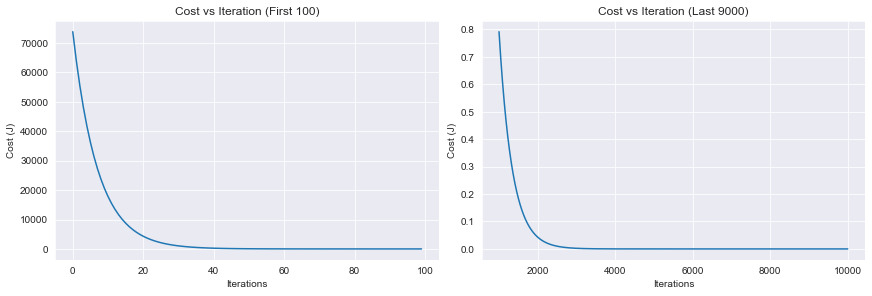

In [8]:
# plot cost versus iteration

fig, ax = plt.subplots(1,2, constrained_layout=True, figsize=(12,4))

ax[0].plot(np.arange(0,100), J_hist[:100])
ax[0].set_title('Cost vs Iteration (First 100)')
ax[0].set_ylabel('Cost (J)')
ax[0].set_xlabel('Iterations')

ax[1].plot(np.arange(1000,10000), J_hist[1000:])
ax[1].set_title('Cost vs Iteration (Last 9000)')
ax[1].set_ylabel('Cost (J)')
ax[1].set_xlabel('Iterations')

plt.show()

### Predictions
Now that you have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

final w = w_final
final b = b_final
predicted equation (hypothesis): 

- yhat = w_final(x) + b_final
- house price in thousands = 200(house size in thousdands) + 100 

In [9]:
# predict price based on 1000, 1200, 2000 sqft
size_input = [1., 1.2, 2.]
for size in size_input:
    price_prediction = round(w_final * size + b_final, 2)
    print(f'{size}k sqft predicted to be ${price_prediction}k')

1.0k sqft predicted to be $300.0k
1.2k sqft predicted to be $340.0k
2.0k sqft predicted to be $500.0k


<a name="toc_40291_2.7.1"></a>
### Learning Rates

In the lecture, there was a discussion related to the proper value of the learning rate, $\alpha$ in equation(3). The larger $\alpha$ is, the faster gradient descent will converge to a solution. But, if it is too large, gradient descent will diverge. Above you have an example of a solution which converges nicely.
​
Let's try increasing the value of  $\alpha$ and see what happens:

In [12]:
# initialize parameters
w_in = 0
b_in = 0

# gradient descent settings
iterations = 100
tmp_alpha = 8.0e-1

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_in, b_in, tmp_alpha,
                                                   iterations, compute_cost, compute_gradient)

print(f'(w, b) found by gradient descent: ({round(w_final, 1)}, {round(b_final, 2)})')

Iteration    0: Cost 1.71e+06  dj_dw: -1.300e+03, dj_db: -8.000e+02   w:  1.040e+03, b: 6.40000e+02
Iteration   10: Cost 1.84e+19  dj_dw: -4.260e+09, dj_db: -2.633e+09   w:  2.786e+09, b: 1.72205e+09
Iteration   20: Cost 1.98e+32  dj_dw: -1.397e+16, dj_db: -8.637e+15   w:  9.141e+15, b: 5.64946e+15
Iteration   30: Cost 2.13e+45  dj_dw: -4.585e+22, dj_db: -2.833e+22   w:  2.999e+22, b: 1.85339e+22
Iteration   40: Cost 2.29e+58  dj_dw: -1.504e+29, dj_db: -9.296e+28   w:  9.838e+28, b: 6.08033e+28
Iteration   50: Cost 2.47e+71  dj_dw: -4.934e+35, dj_db: -3.050e+35   w:  3.228e+35, b: 1.99474e+35
Iteration   60: Cost 2.65e+84  dj_dw: -1.619e+42, dj_db: -1.000e+42   w:  1.059e+42, b: 6.54406e+41
Iteration   70: Cost 2.86e+97  dj_dw: -5.311e+48, dj_db: -3.282e+48   w:  3.474e+48, b: 2.14688e+48
Iteration   80: Cost 3.08e+110  dj_dw: -1.742e+55, dj_db: -1.077e+55   w:  1.140e+55, b: 7.04316e+54
Iteration   90: Cost 3.31e+123  dj_dw: -5.716e+61, dj_db: -3.533e+61   w:  3.739e+61, b: 2.31062e+6

Above, $w$ and $b$ are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration $\frac{\partial J(w,b)}{\partial w}$ changes sign and cost is increasing rather than decreasing. This is a clear sign that the *learning rate is too large* and the solution is diverging. 
